In [1]:
# Import Libraries and Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


# Read flights data

flights_df= pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv",low_memory=False)


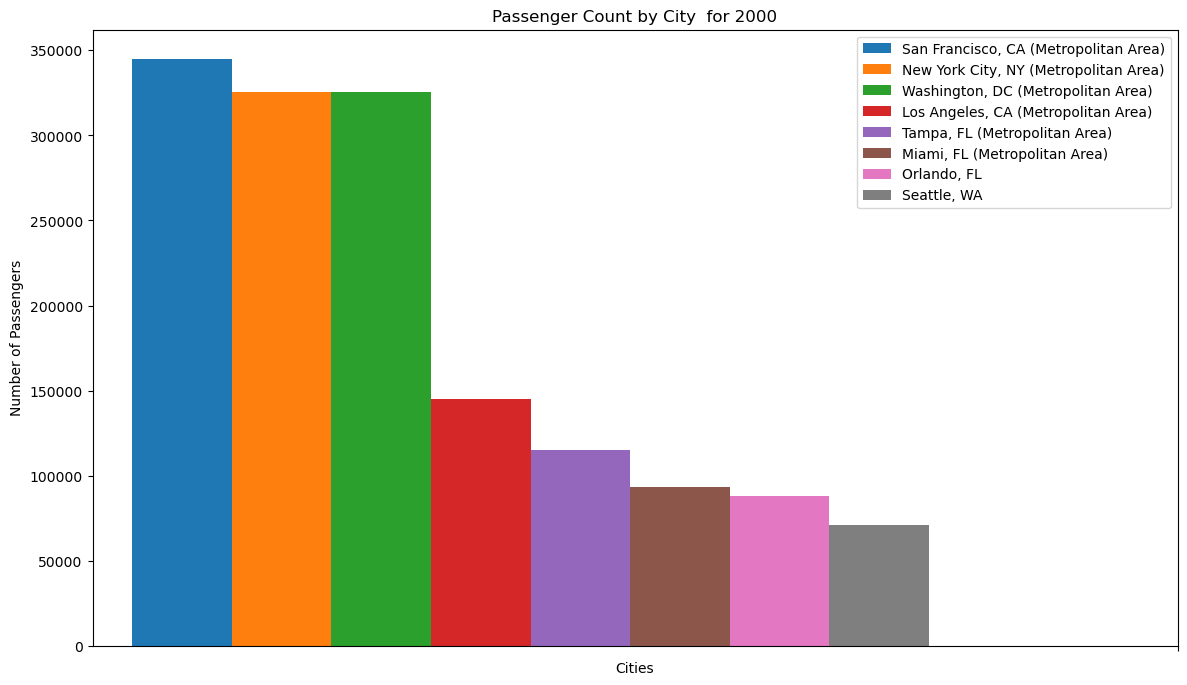

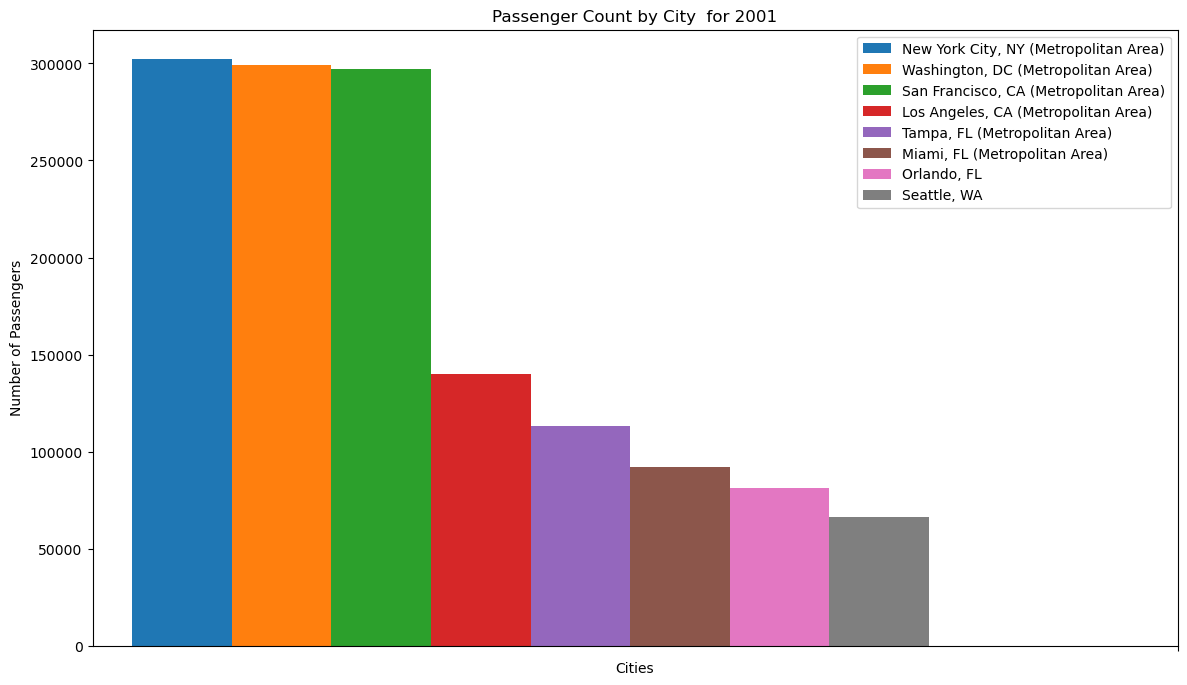

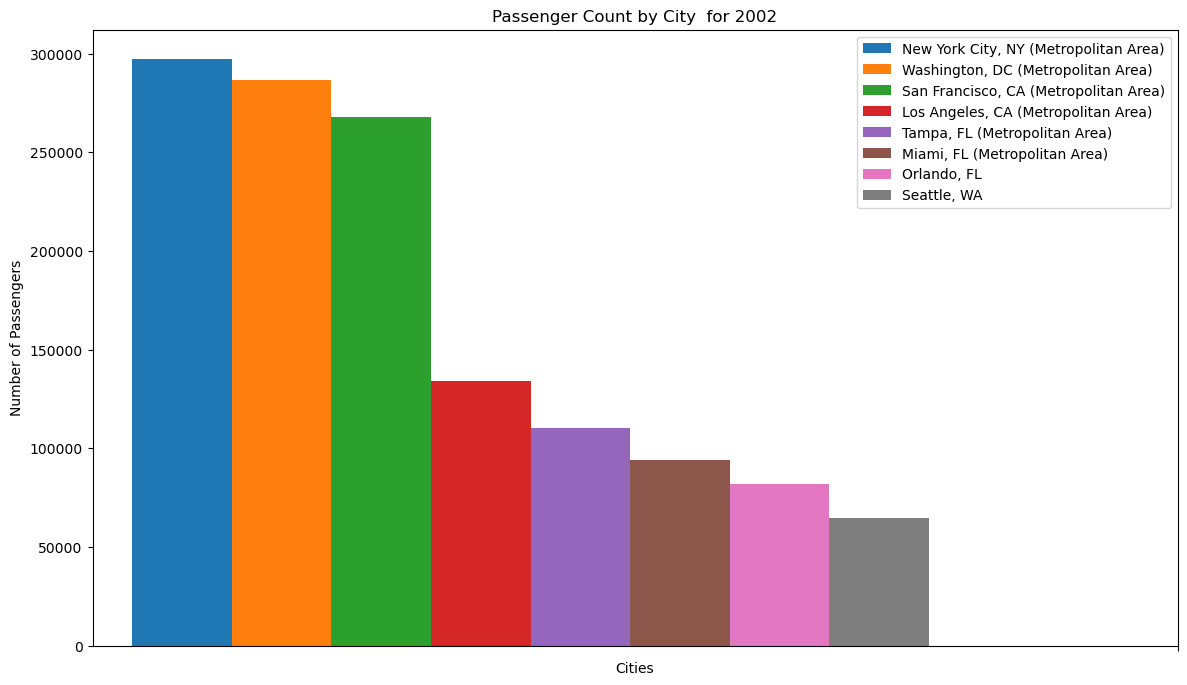

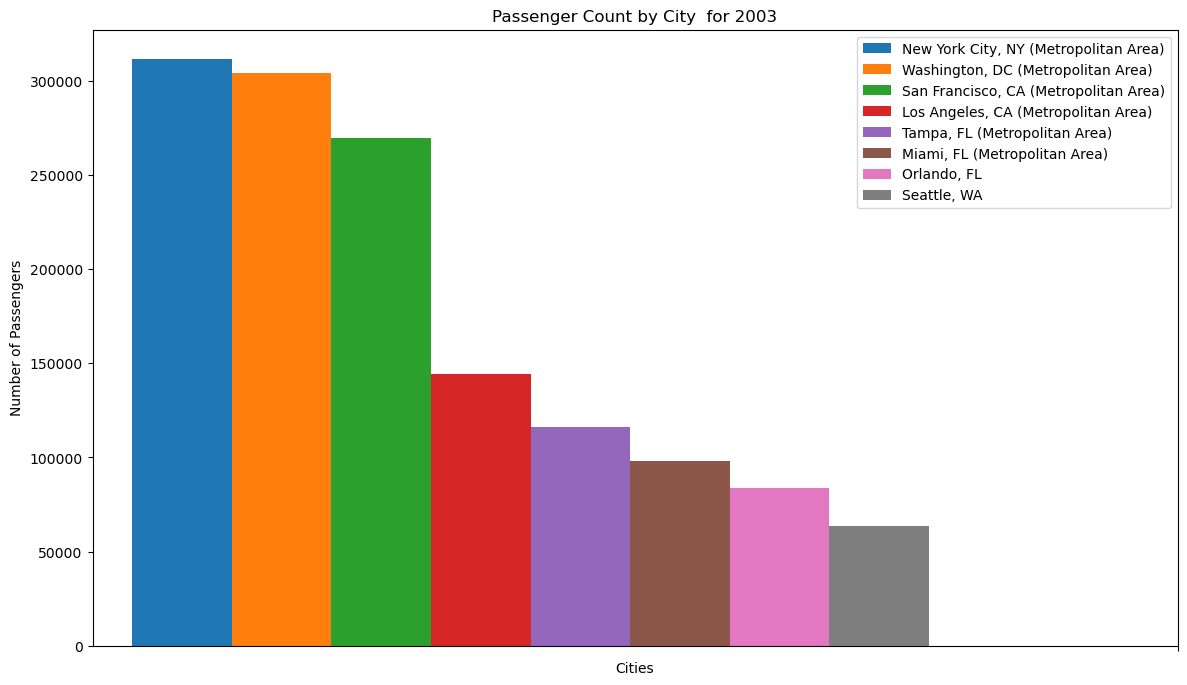

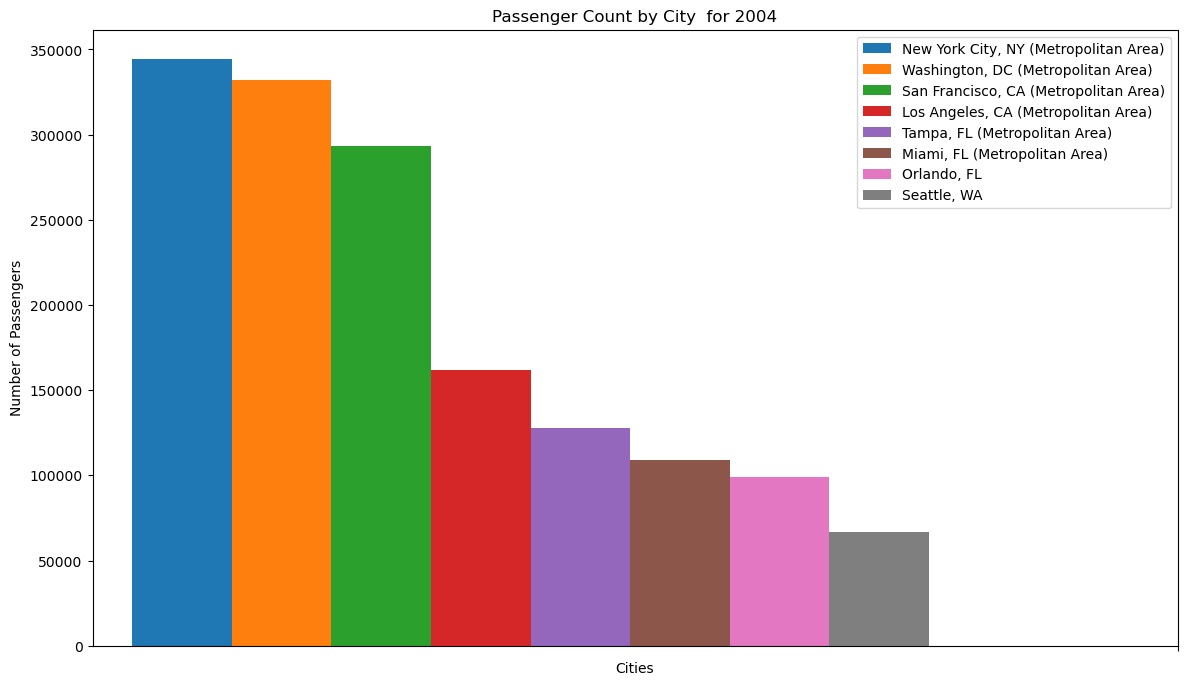

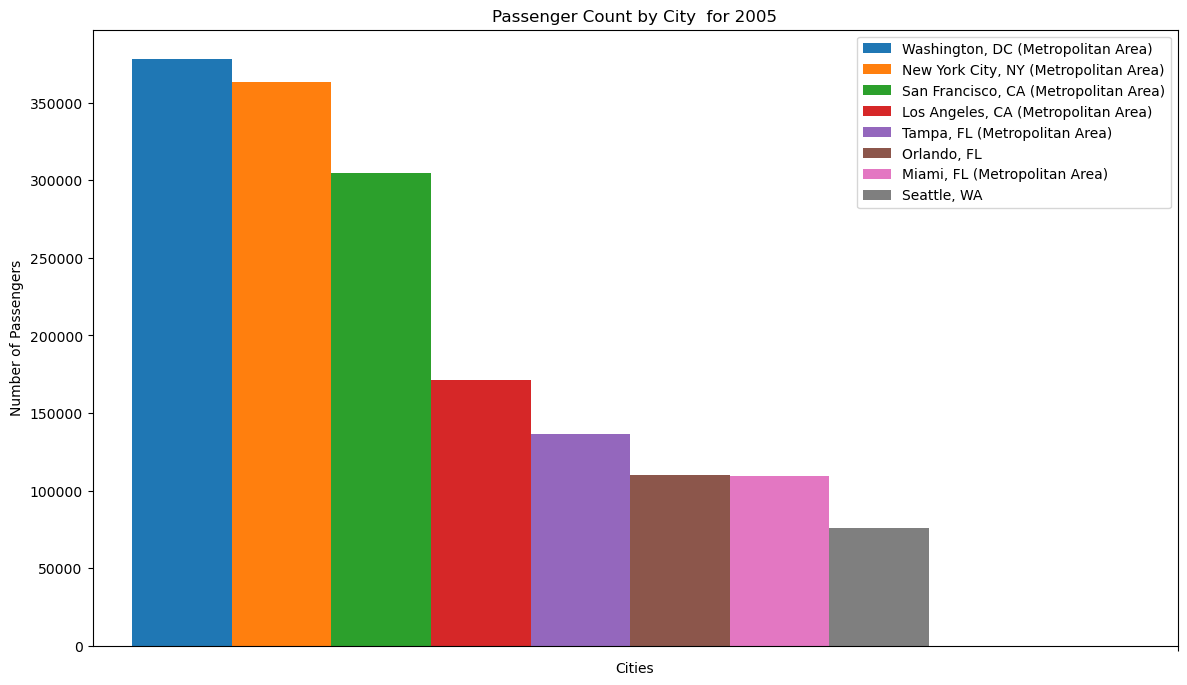

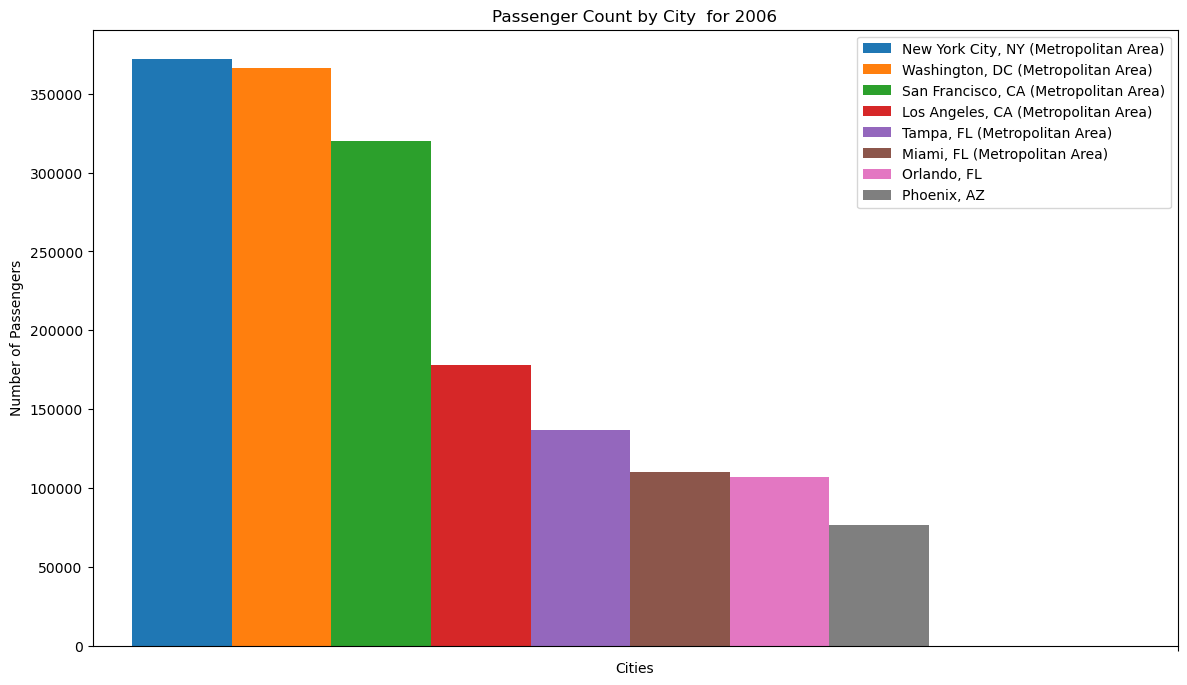

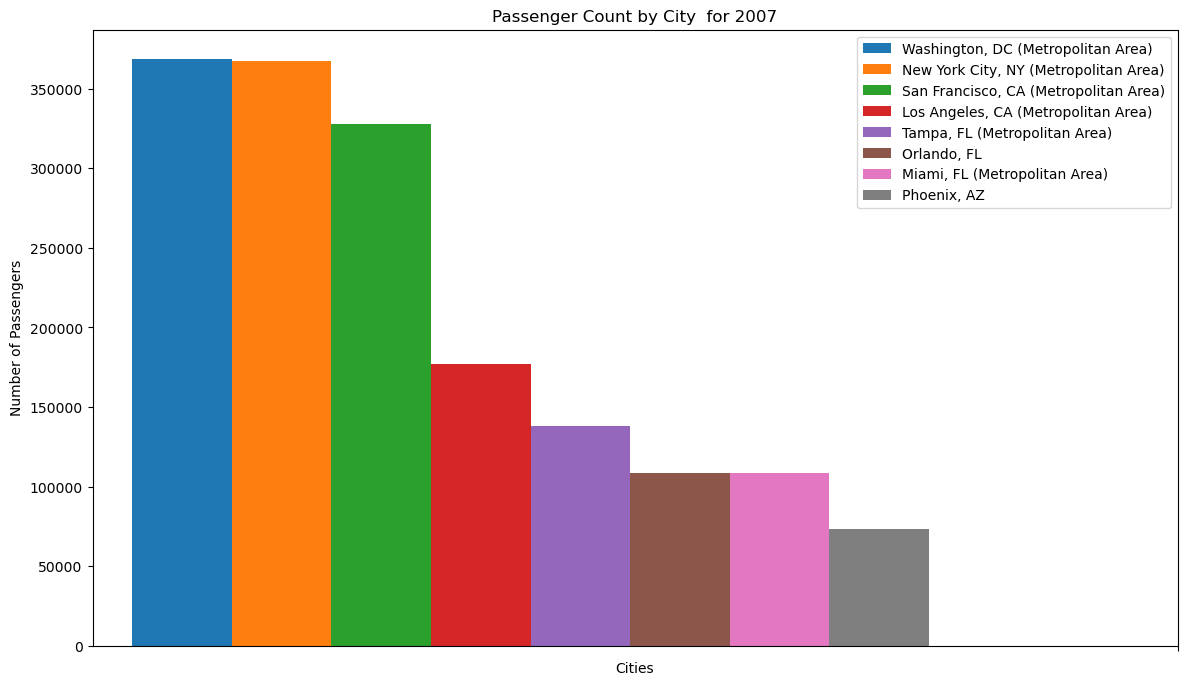

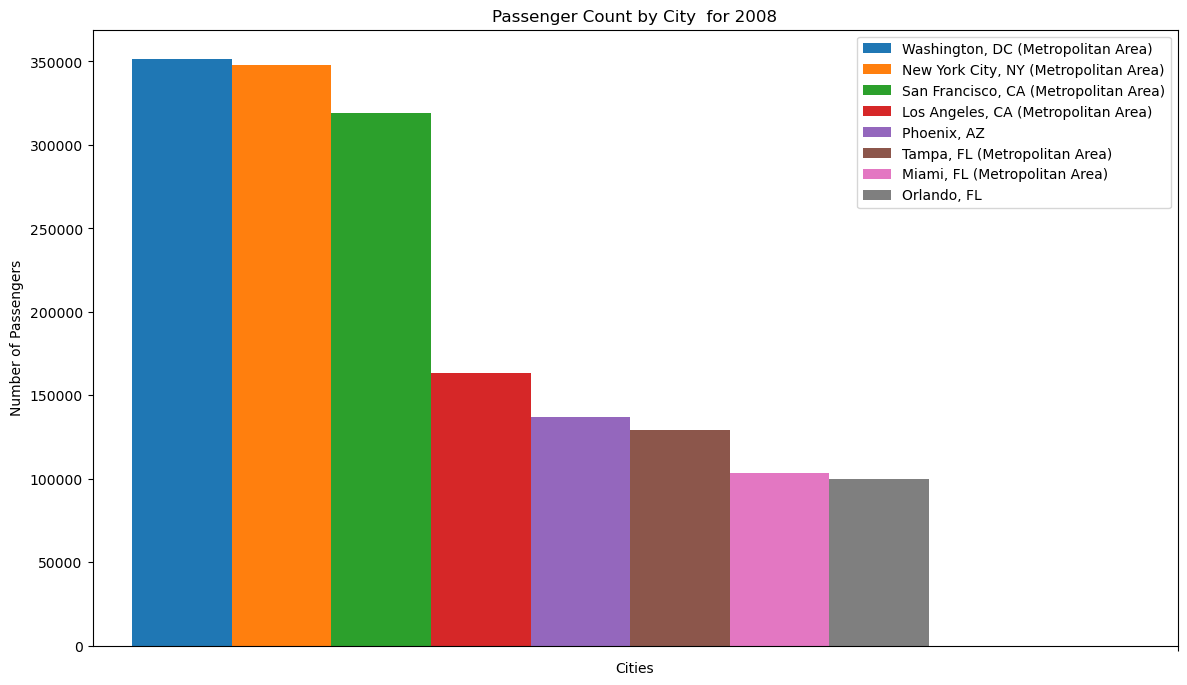

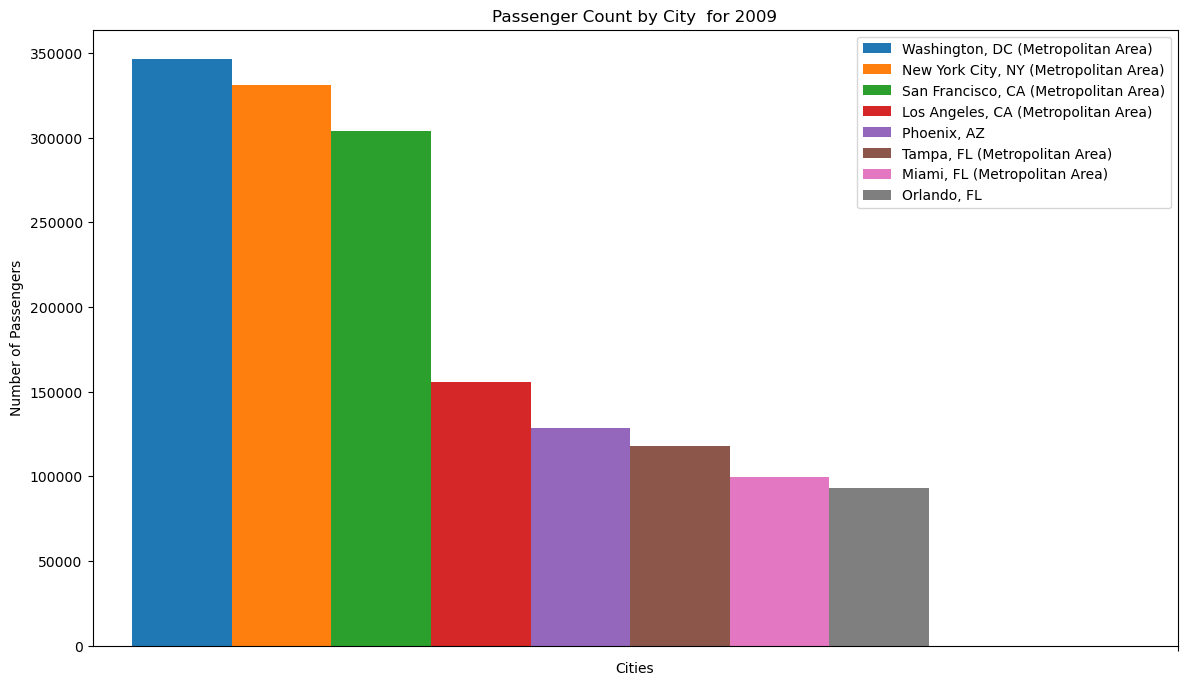

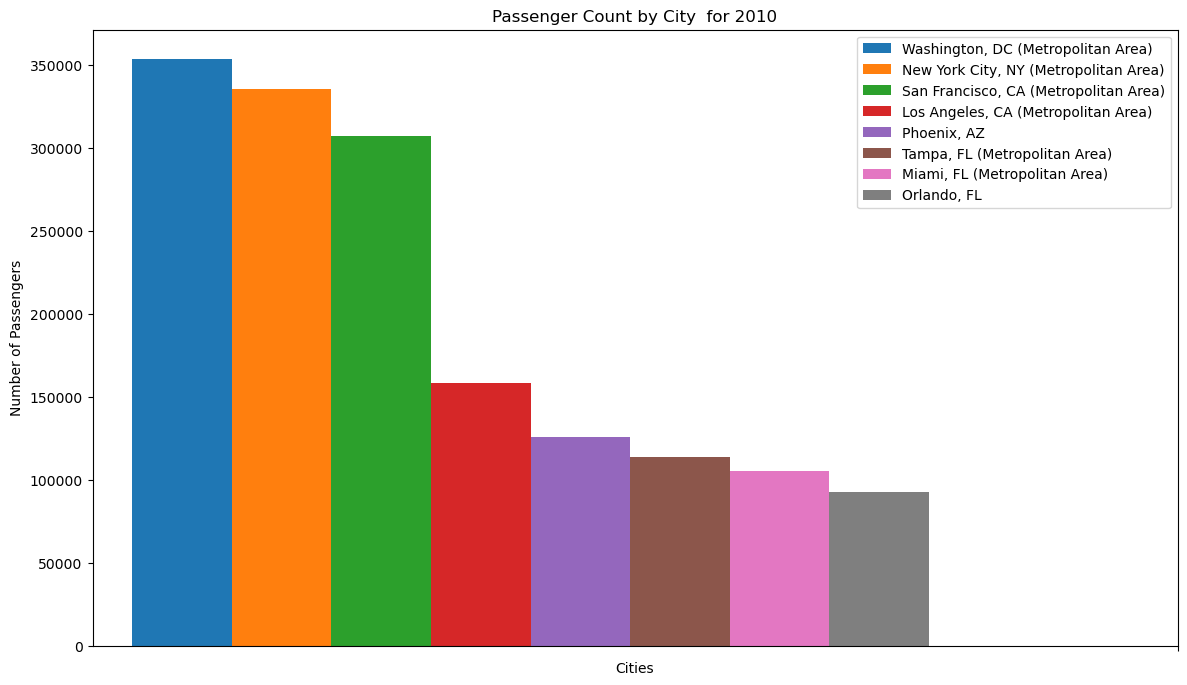

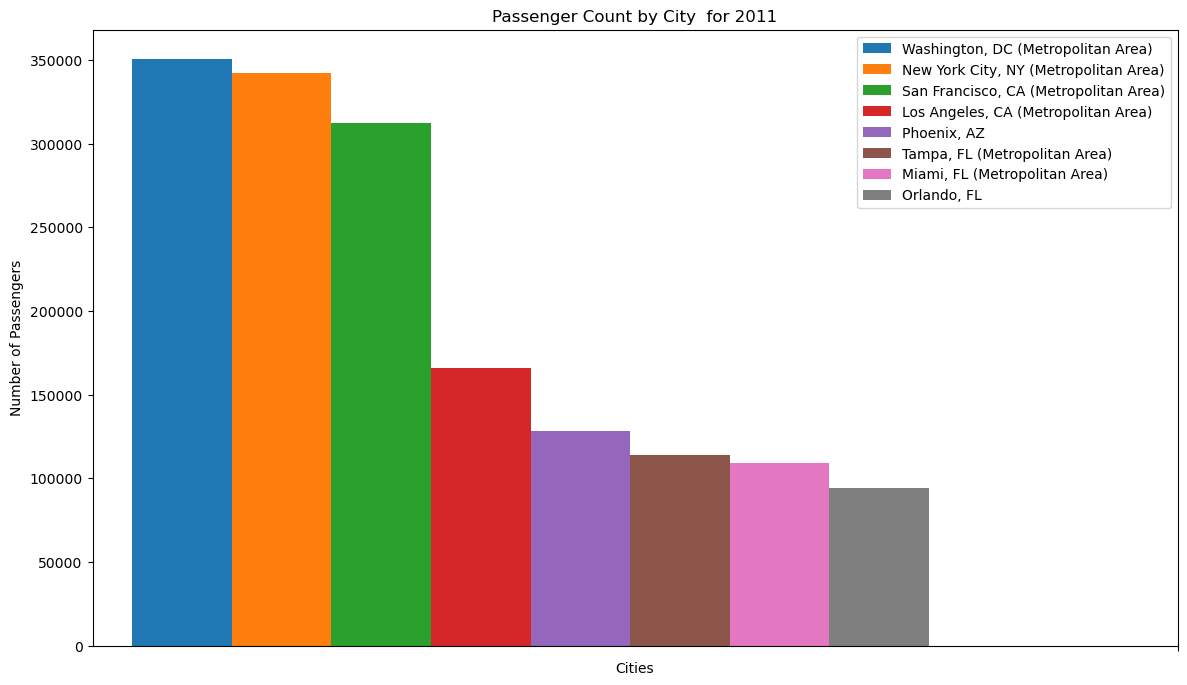

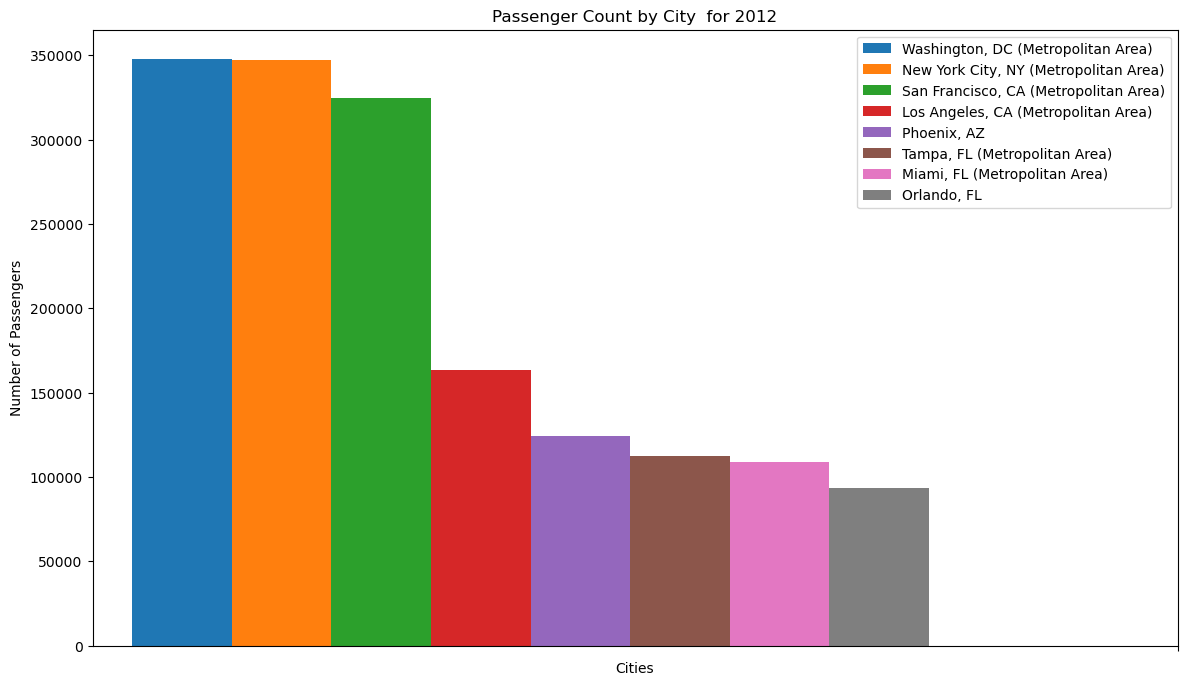

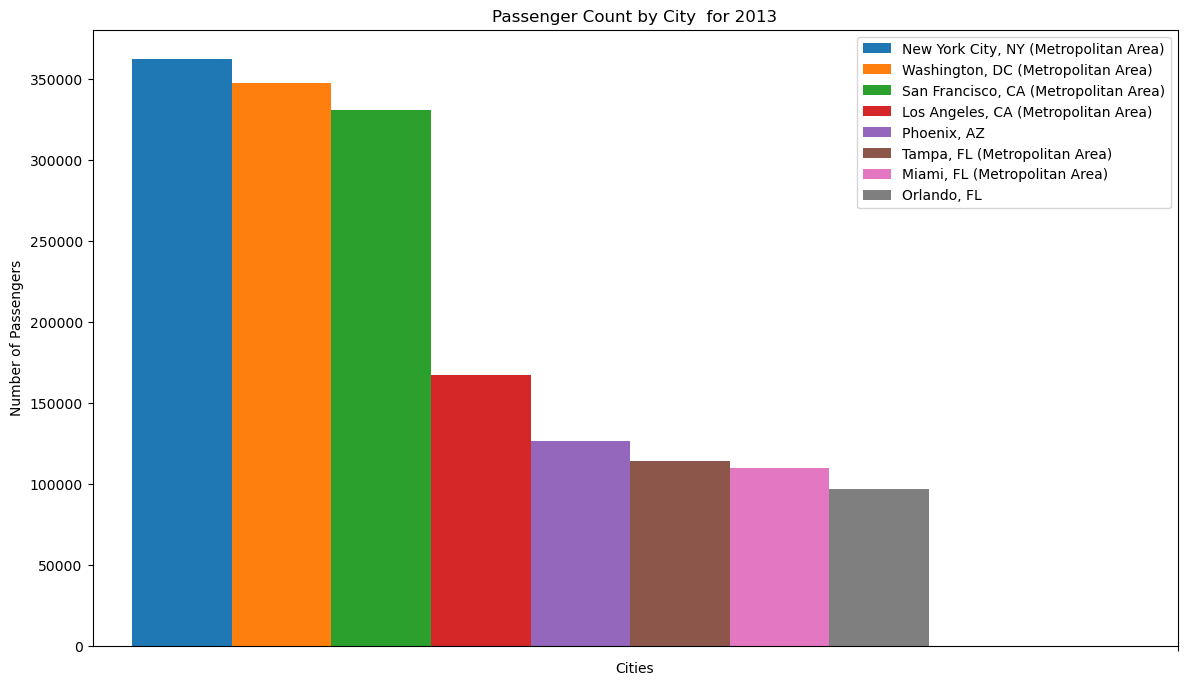

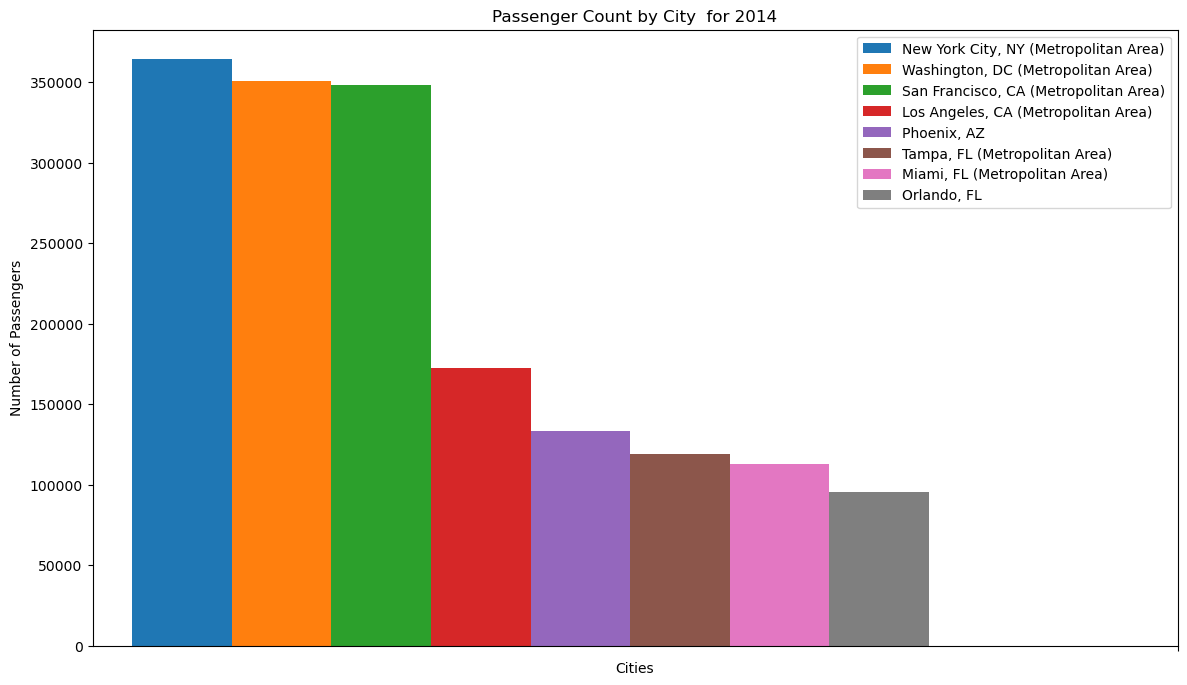

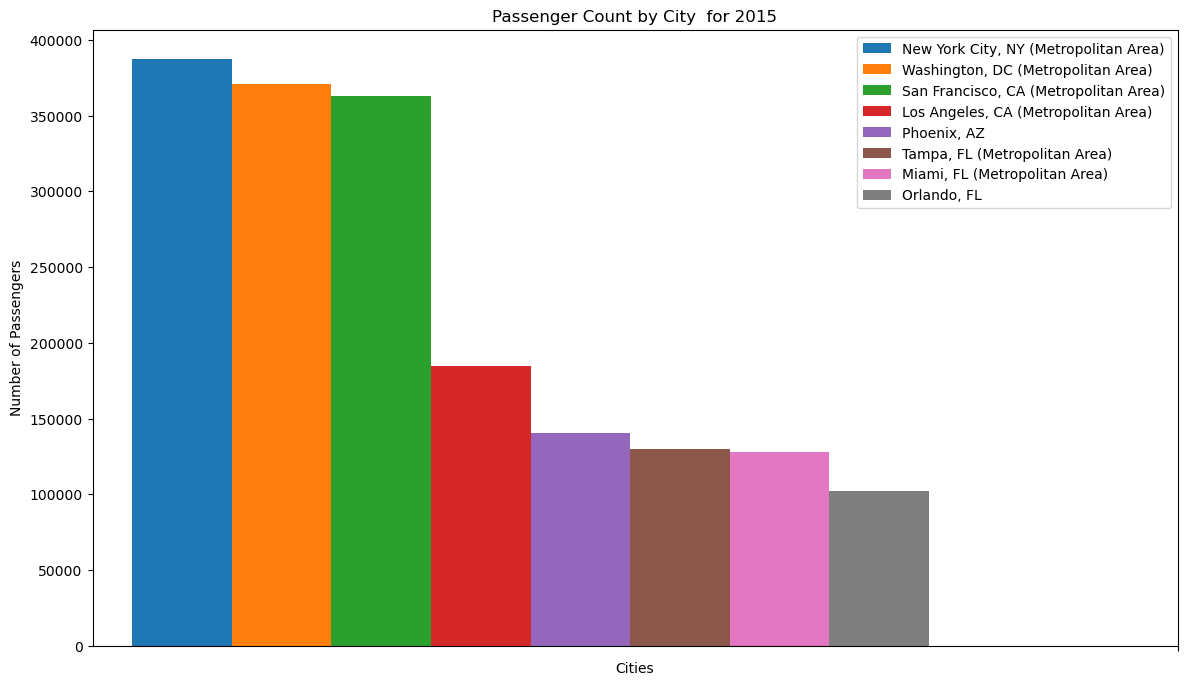

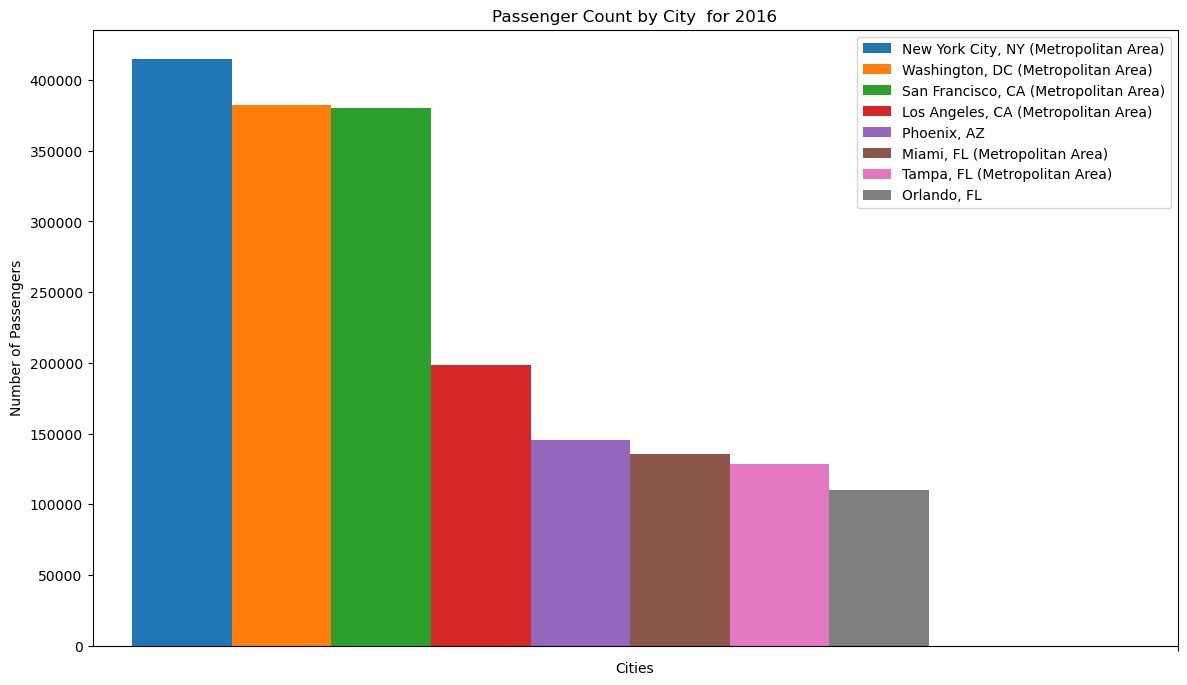

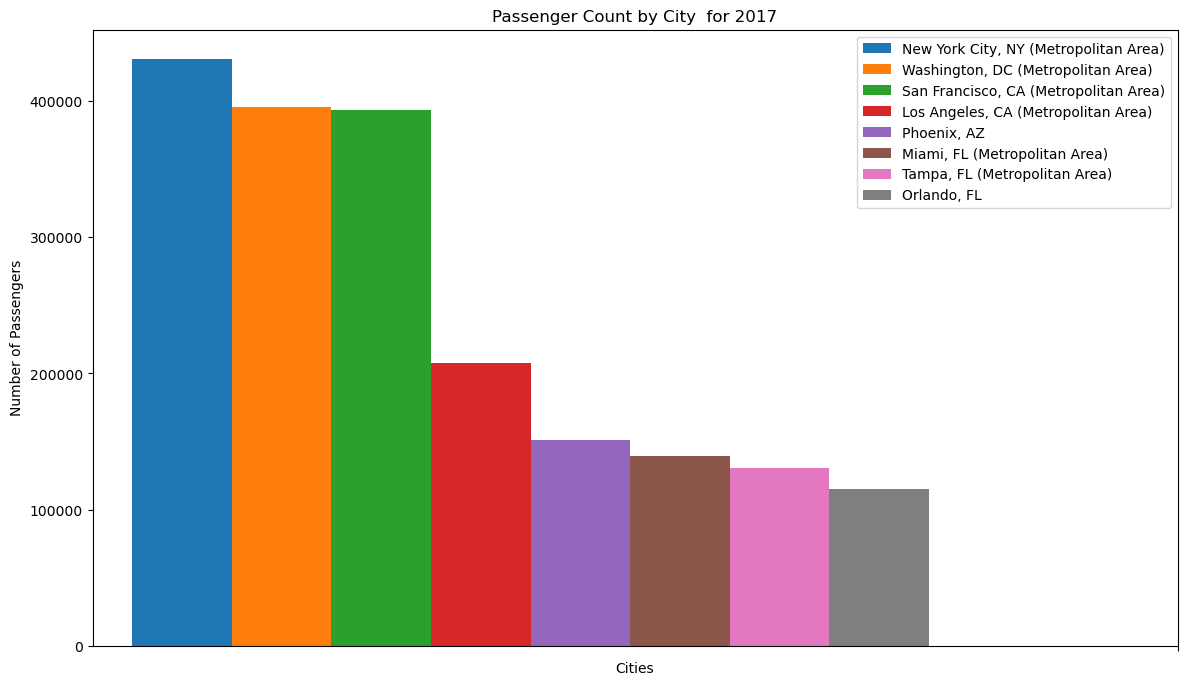

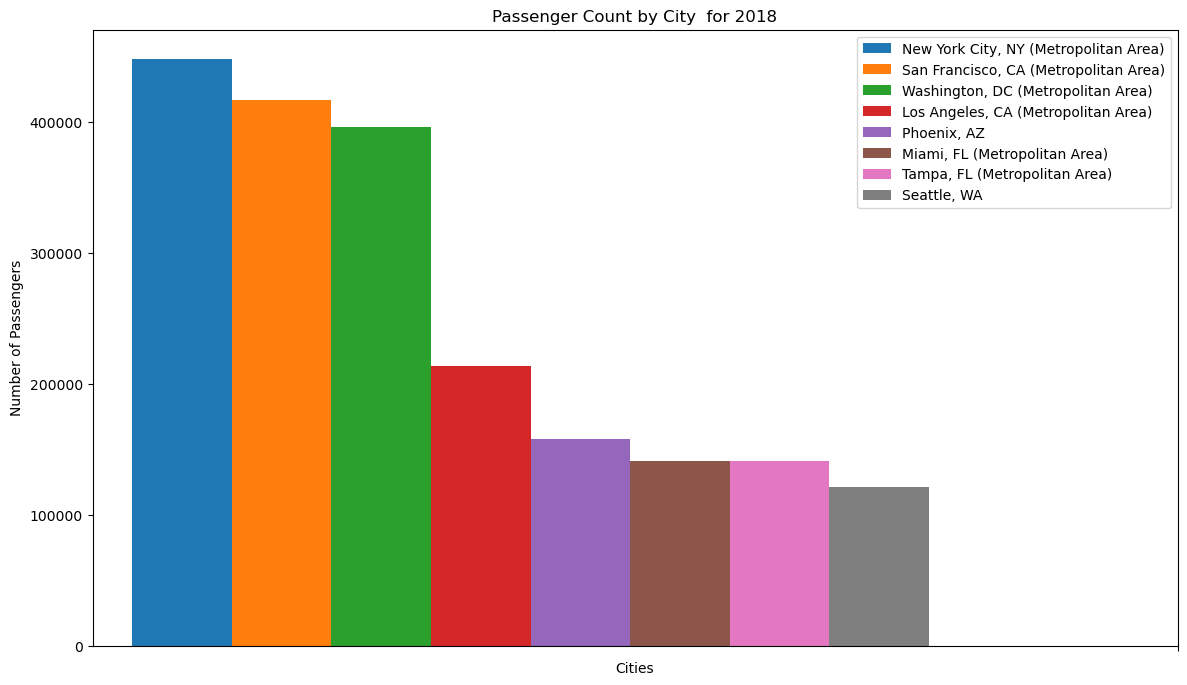

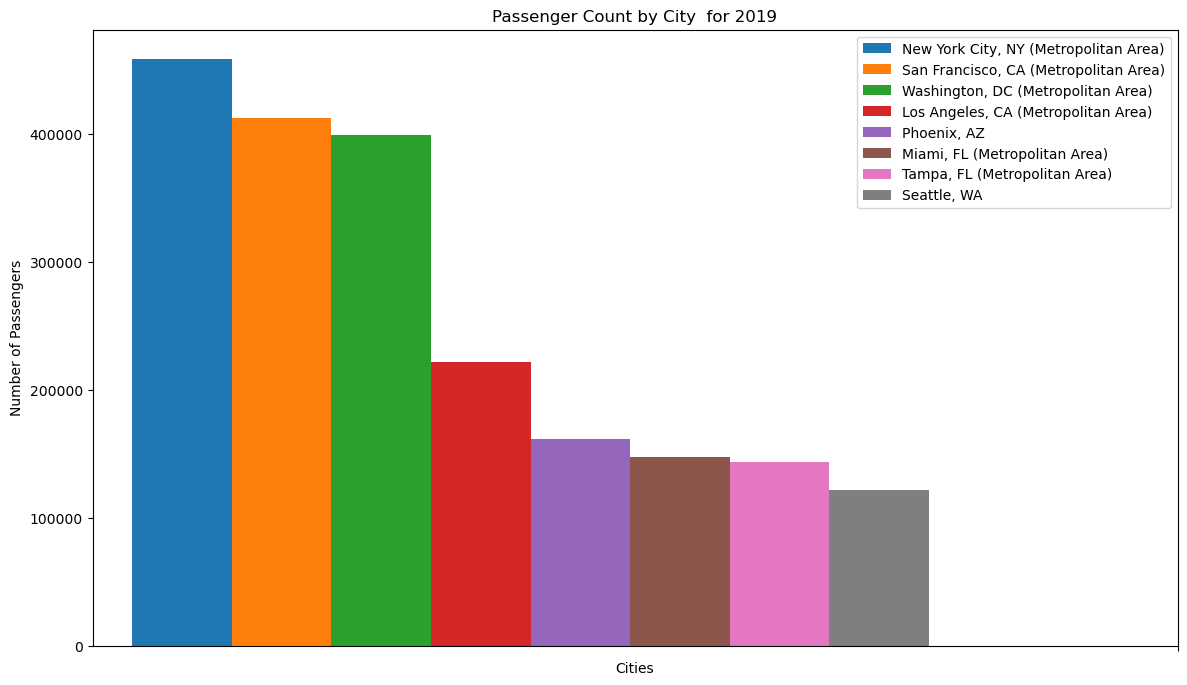

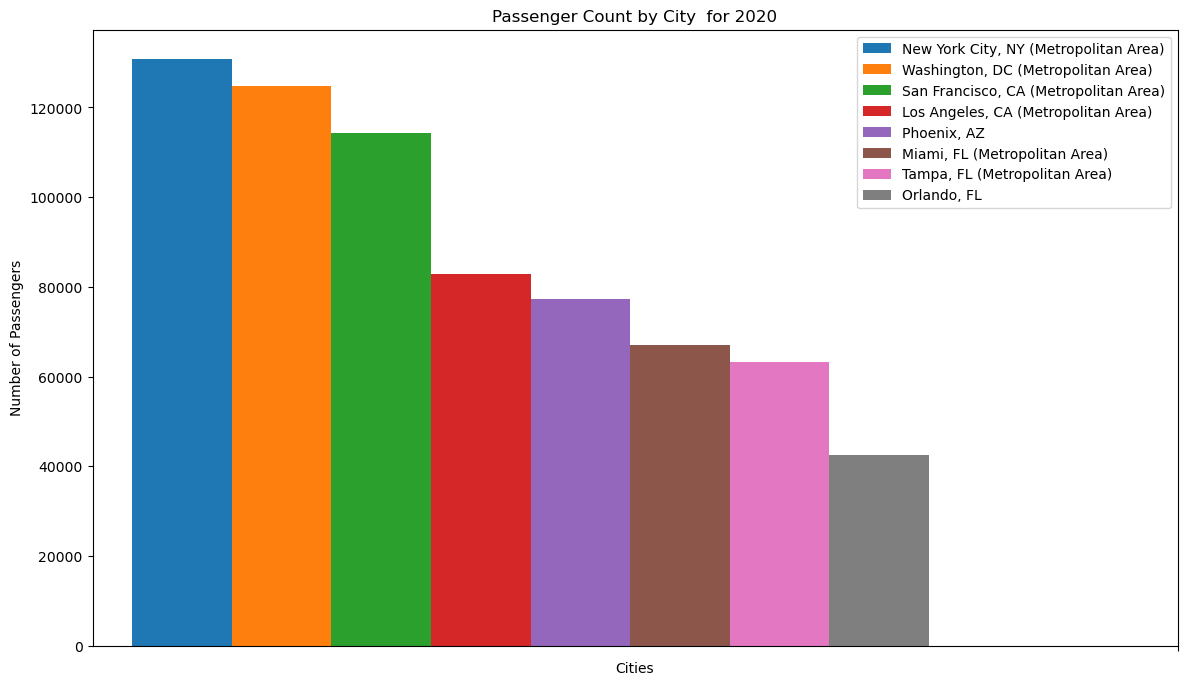

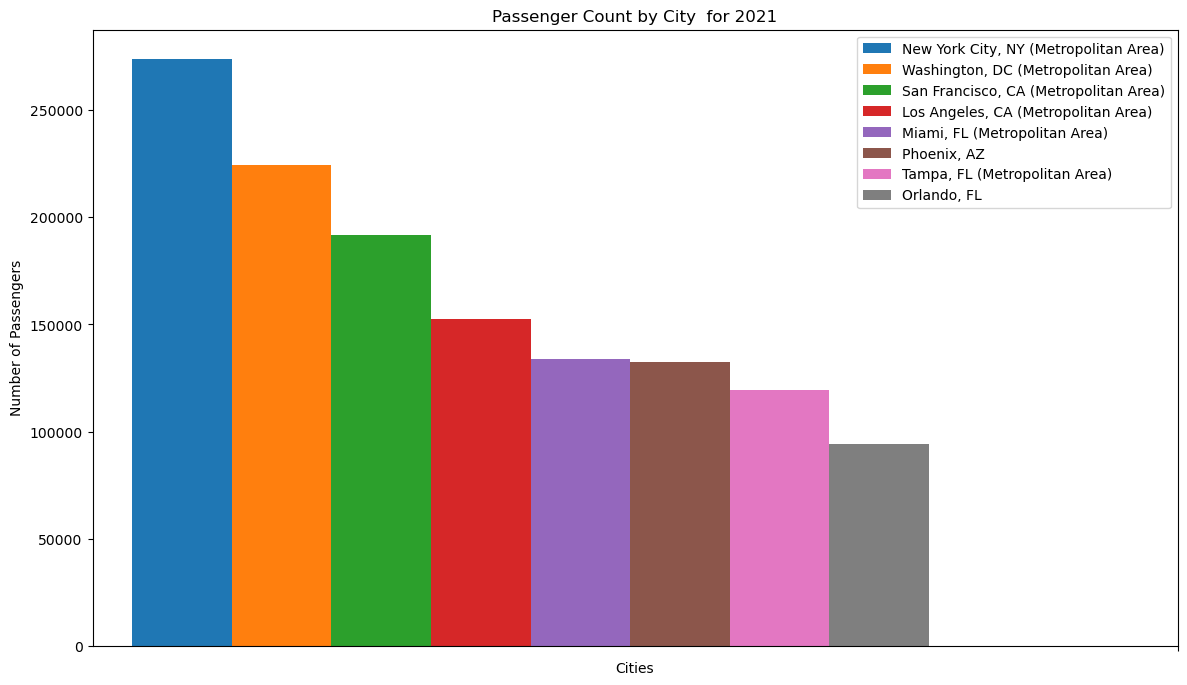

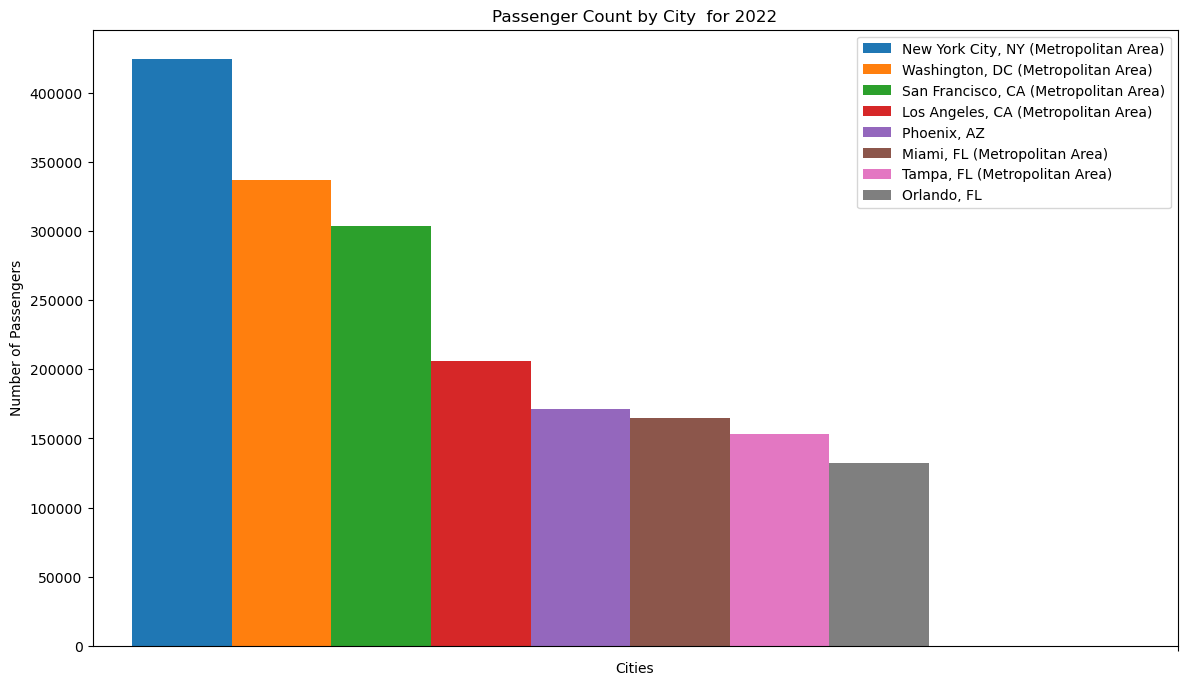

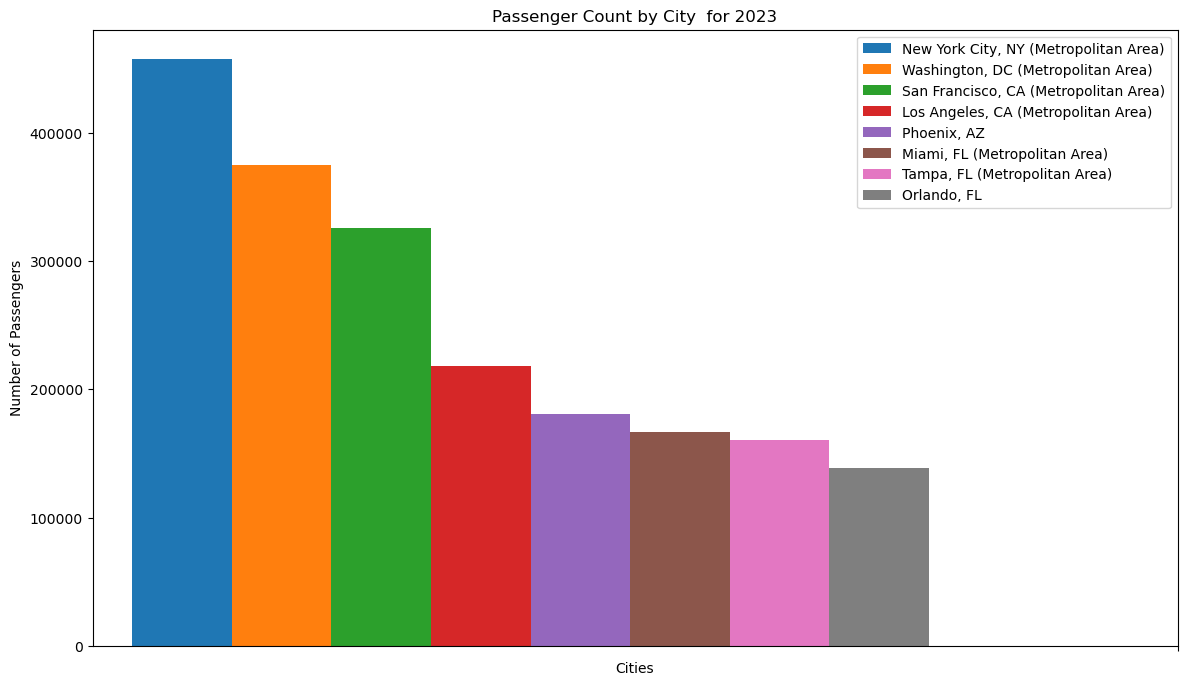

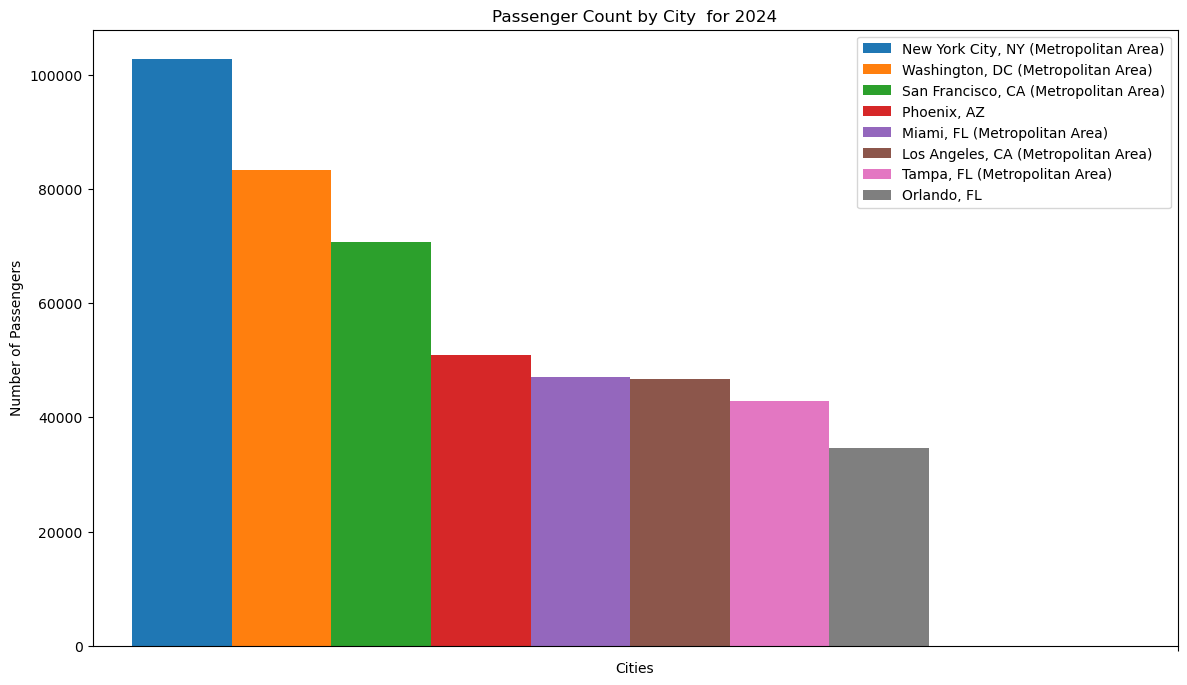

In [2]:
#group by year
grouped_df = flights_df.groupby(['city2',  'Year'])['passengers'].sum().reset_index()
# Get the unique years
years = grouped_df['Year'].unique()
years = years[years>1999]

# Plotting one graph for each year
for year in years:
    # Filter the data for the current year
    df_year = grouped_df[grouped_df['Year'] == year]
    
    # Find the top 8 cities with the most passengers for the current year
    top_cities = df_year.groupby('city2')['passengers'].sum().nlargest(8).index
    
    # Filter the DataFrame to include only the top 8 cities
    filtered_df = df_year[df_year['city2'].isin(top_cities)]
    
    # Plotting
    plt.figure(figsize=(14, 8))
    for city in top_cities:
        city_data = filtered_df[filtered_df['city2'] == city]
        plt.bar( (0.1 * list(top_cities).index(city)), 
                city_data['passengers'], 
                width=0.1, 
                label=city)
    
    plt.xlabel('Cities')
    plt.ylabel('Number of Passengers')
    #plt.ylim(top=150000)
    plt.title(f'Passenger Count by City  for {year}')
    #plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
    plt.xticks([1], [ ''])
    plt.legend(title='City')
    #plt.legend(loc='upper left', bbox_to_anchor=(0.05, 1))
    plt.legend(loc='upper right')
    
# saving the plot in a png file
    plot_name='flight_by_year_'+str(year)+".png"
    plt.savefig(plot_name, format='png', dpi=300)
#showing the plot
    plt.show()

